In [ ]:
!pip install gurobipy

# Markdown Game Strategy

Finding the optimal strategy for the markdown game

In [162]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from re import sub
import numpy as np
from scipy import stats
sns.set_style("whitegrid")

## Explore the dataset that is provided to us

In [163]:
df = pd.read_excel("Sales-Data.xlsx")

In [164]:
df.head()

,Item,Week,Price,Sales,Remaining Inventory
0,1,1,60,57,1943
1,1,2,60,98,1845
2,1,3,60,55,1790
3,1,4,60,41,1749
4,1,5,60,60,1689


Number of sales depending on the price

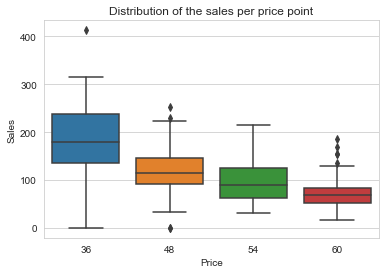

In [165]:
sns.boxplot(x=df.Price, y=df.Sales)
plt.title("Distribution of the sales per price point")
plt.show()

Same thing but looking at histogram

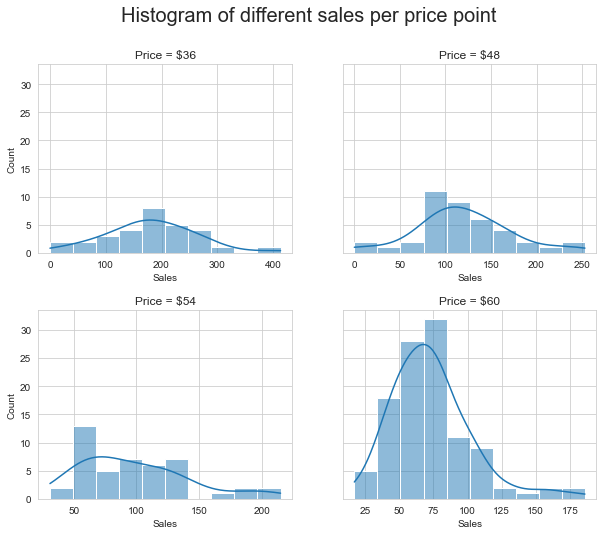

In [166]:
fig, axes = plt.subplots(2,2, figsize=(10, 8), sharey=True)
axes = axes.flatten()
fig.suptitle("Histogram of different sales per price point", fontsize=20)
i=0
for price in [36, 48, 54, 60]:
    sns.histplot(ax=axes[i], x=df.loc[df.Price==price].Sales, bins=10, kde=True)
    axes[i].set_title("Price = $" + str(price))
    i+=1
fig.subplots_adjust(hspace=0.3)

Checking how the week# influences the number of sales

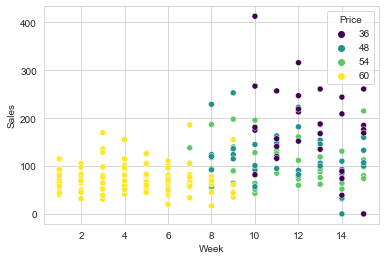

In [167]:
sns.scatterplot(x=df.Week, y=df.Sales, hue=df.Price, palette="viridis")
plt.show()

How does the first week of sales dictates the other weeks?

In [168]:
# Add a column first week sale
first_sales = list(df.Sales.loc[df.groupby("Item").cumcount().eq(0)])
i = list(df.Item.unique())

mapping = {i+1: value for i, value in enumerate(first_sales)}
df["first_sale"] = df.Item.map(mapping)

df.head()

,Item,Week,Price,Sales,Remaining Inventory,first_sale
0,1,1,60,57,1943,57
1,1,2,60,98,1845,57
2,1,3,60,55,1790,57
3,1,4,60,41,1749,57
4,1,5,60,60,1689,57


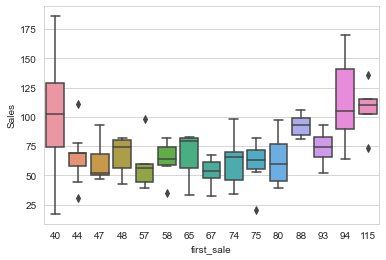

In [169]:
# Plot the result (only when the price is 60)
sns.boxplot(x=df["first_sale"].loc[df.Price==60], y=df.Sales.loc[df.Price==60])
plt.show()

How about the first two sales

In [170]:
first2_sales = list(2000-df["Remaining Inventory"].loc[df.groupby("Item").cumcount().eq(1)])
i = list(df.Item.unique())


mapping = {i+1: value for i, value in enumerate(first2_sales)}
df["first2_sale"] = df.Item.map(mapping)

df.head()

,Item,Week,Price,Sales,Remaining Inventory,first_sale,first2_sale
0,1,1,60,57,1943,57,155
1,1,2,60,98,1845,57,155
2,1,3,60,55,1790,57,155
3,1,4,60,41,1749,57,155
4,1,5,60,60,1689,57,155


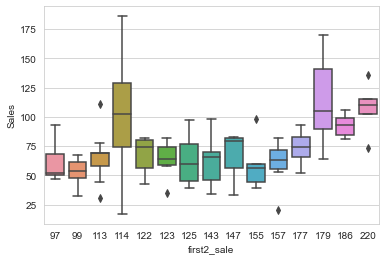

In [171]:
# Plot the result (only when the price is 60)
sns.boxplot(x=df["first2_sale"].loc[df.Price==60], y=df.Sales.loc[df.Price==60])
plt.show()

There might be some correlation using the first weeks of sales but unclear with the number of data points that we have.  We can see that when the Total Sales after two weeks are above 160, there seems to be some correlation that indicates the median sale will be much higher than for the other.

## Calculating correlations
using linear regression models

### Linear model with sales over price

In [172]:
import statsmodels.formula.api as smf
lm1 = smf.ols(data=df, formula="Sales ~ Price").fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 09 May 2022   Prob (F-statistic):           7.74e-24
Time:                        16:01:32   Log-Likelihood:                -1186.1
No. Observations:                 225   AIC:                             2376.
Df Residuals:                     223   BIC:                             2383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    334.9640     20.863     16.055      0.0

In [173]:
import statsmodels.formula.api as smf
lm1 = smf.ols(data=df, formula="Sales ~ Price").fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 09 May 2022   Prob (F-statistic):           7.74e-24
Time:                        16:01:32   Log-Likelihood:                -1186.1
No. Observations:                 225   AIC:                             2376.
Df Residuals:                     223   BIC:                             2383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    334.9640     20.863     16.055      0.0

### With price and week

In [174]:
lm2 = smf.ols(data=df, formula="Sales ~ Price+Week").fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     66.36
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.56e-23
Time:                        16:01:32   Log-Likelihood:                -1184.6
No. Observations:                 225   AIC:                             2375.
Df Residuals:                     222   BIC:                             2385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    386.0742     36.266     10.646      0.0

In [175]:
df['Revenue'] = df.Price * df.Sales

In [176]:
import statsmodels.formula.api as smf
lm2 = smf.ols(data=df, formula = "Sales ~ Price * Week").fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     47.16
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.35e-23
Time:                        16:01:32   Log-Likelihood:                -1181.7
No. Observations:                 225   AIC:                             2371.
Df Residuals:                     221   BIC:                             2385.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    643.7429    112.455      5.724      0.0

The third regression gives the best results.

In [177]:
# Get the coefficients
lm2.params

Intercept     643.742885
Price          -9.450952
Week          -23.861872
Price:Week      0.381639
dtype: float64

Alternate Approach

In [178]:
import statsmodels.formula.api as smf
lm3 = smf.ols(data=df, formula = "Sales ~ C(Price) + Week").fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     33.36
Date:                Mon, 09 May 2022   Prob (F-statistic):           9.52e-22
Time:                        16:01:34   Log-Likelihood:                -1184.0
No. Observations:                 225   AIC:                             2378.
Df Residuals:                     220   BIC:                             2395.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        212.5848     19.289     11.

## Static Markdown Optimization
We optimize the problem in advance, not requiring to update based on the results we are seeing.
This is an approach that requires less computing power and can serve as a baseline for comparison for dynamic approaches.

Here, we want to optimize the total revenues

Start by creating 4 revenue formulas based on the 4 price points.
Y is the revenues generated at each price point and week#

In [19]:
y = np.zeros((4,4))
p = list(df.Price.unique())
y= np.array(lm2.params)
print(y)

[ 6.43742885e+02 -9.45095190e+00 -2.38618716e+01  3.81639277e-01]


In [20]:
import gurobipy as gp
from gurobipy import GRB

In [21]:
model = gp.Model("linear_model")

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-07


In [22]:
# Decision variable
n_weeks = 15
# i price point and j weeks
X = model.addVars(4,n_weeks, vtype=GRB.BINARY, name="X")
S = model.addVar(1, name="Sales")

In [23]:
week = list(range(1,n_weeks+1))
sales = gp.quicksum(
    X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
)
revenue = gp.quicksum(
    p[i]*X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
)

model.setObjective(revenue, sense=GRB.MAXIMIZE)

In [24]:
# Constraints
# 1 week selected
model.addConstrs((gp.quicksum(X[i,j] for i in range(4)) <= 1 for j in range(n_weeks)), name="PriceStratEachWeek")

# Maximum sales of 2000
model.addConstr(S == sales)
model.addConstr(0<=2000-sales, name="MaxSales")

# First week is full price
model.addConstr(X[0,0] == 1, name="FirstWeekFullPrice")

# Sub-sequent weeks cannot have price (based on index) lower than the current one
for j in range(1, n_weeks):
  for i in range(1, 5):
    model.addConstr(X[i-1, j-1] <= (gp.quicksum(X[k, j] for k in range(i-1, 4))), name=f"SubsequentPriceConstraint_i_j")

In [25]:
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 74 rows, 61 columns and 378 nonzeros
Model fingerprint: 0xbfed508a
Variable types: 1 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [4e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 32 rows and 17 columns
Presolve time: 0.01s
Presolved: 42 rows, 44 columns, 153 nonzeros
Variable types: 0 continuous, 44 integer (44 binary)
Found heuristic solution: objective 85931.338695
Found heuristic solution: objective 87200.518524
Found heuristic solution: objective 97234.879454

Root relaxation: objective 9.822794e+04, 30 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 infeasib

In [26]:
print(f"Average Revenue to be Expected = {model.objVal}")
res=[]
for v in model.getVars():
    if v.x>0:
        res.append(v.varName+ " = " + str(v.x))
for i in sorted(res):
  print(i)

Average Revenue to be Expected = 97234.87945444147
Sales = 1975.4815646603365
X[0,0] = 1.0
X[1,1] = 1.0
X[1,2] = 1.0
X[2,10] = 1.0
X[2,11] = 1.0
X[2,12] = 1.0
X[2,13] = 1.0
X[2,14] = 1.0
X[2,3] = 1.0
X[2,4] = 1.0
X[2,5] = 1.0
X[2,6] = 1.0
X[2,7] = 1.0
X[2,8] = 1.0
X[2,9] = 1.0


In [27]:
print(f"Average Revenue to be Expected = {model.objVal}\n")
res={}
i=0
for v in model.getVars():
    if v.x==1:
        res[int(v.varName[2:-1].split(',')[-1])] = f"""Price: {p[int(v.varName[2:-1].split(',')[0])]}"""
        i+=1
res

Average Revenue to be Expected = 97234.87945444147



{0: 'Price: 60',
 1: 'Price: 54',
 2: 'Price: 54',
 3: 'Price: 48',
 4: 'Price: 48',
 5: 'Price: 48',
 6: 'Price: 48',
 7: 'Price: 48',
 8: 'Price: 48',
 9: 'Price: 48',
 10: 'Price: 48',
 11: 'Price: 48',
 12: 'Price: 48',
 13: 'Price: 48',
 14: 'Price: 48'}

In [28]:
print(f"Average Revenue to be Expected = {model.objVal}\n")

for v in model.getVars():
    if v.x>0:
        print(v.varName, "=", v.x)

Average Revenue to be Expected = 97234.87945444147

X[0,0] = 1.0
X[1,1] = 1.0
X[1,2] = 1.0
X[2,3] = 1.0
X[2,4] = 1.0
X[2,5] = 1.0
X[2,6] = 1.0
X[2,7] = 1.0
X[2,8] = 1.0
X[2,9] = 1.0
X[2,10] = 1.0
X[2,11] = 1.0
X[2,12] = 1.0
X[2,13] = 1.0
X[2,14] = 1.0
Sales = 1975.4815646603365


In [29]:
p

[60, 54, 48, 36]

## Dynamic Markdown Optimization
Manual Sales Input for Now

In [30]:
def _take_action(sales_record=[], lm2=lm2):
    # Taking sales_record and regression (statsmodels.regression.linear_model.RegressionResultsWrapper) 
    ## Define a strategy to take play the game ##

    # Using Gurobi # 

    # Storing previuos sales information
    current_sales = sales_record

    # Start by creating 4 revenue formulas based on the 4 price points. Y is the revenues generated at each price point and week#
    y = np.zeros((4,4))
    p = list(df.Price.unique())
    y= np.array(lm2.params)
    # print(y) # Coefficients

    import gurobipy as gp
    from gurobipy import GRB

    model = gp.Model("linear_model")

    # Decision variable
    n_weeks = 15 - len(current_sales)
    # i price point and j weeks
    X = model.addVars(4,n_weeks, vtype=GRB.BINARY, name="X")
    S = model.addVar(1, name="Sales")

    # Objective
    week = list(range(1,n_weeks+1))
    sales = gp.quicksum(
        X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
    )
    revenue = gp.quicksum(
        p[i]*X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
    )

    model.setObjective(revenue, sense=GRB.MAXIMIZE)

    # Constraints
    # 1 week selected
    model.addConstrs((gp.quicksum(X[i,j] for i in range(4)) <= 1 for j in range(n_weeks)), name="PriceStratEachWeek")

    # Maximum sales of 2000
    model.addConstr(S == sales)
    model.addConstr(0<=2000-sales, name="MaxSales")

    # # First week is full price
    # model.addConstr(X[0,0] == 1, name="FirstWeekFullPrice")

    # Sub-sequent weeks cannot have price (based on index) lower than the current one
    for j in range(1, n_weeks):
      for i in range(1, 5):
        model.addConstr(X[i-1, j-1] <= (gp.quicksum(X[k, j] for k in range(i-1, 4))), name=f"SubsequentPriceConstraint_i_j")

    model.Params.LogToConsole = 0
    model.optimize()


    # print(f"Average Revenue to be Expected = {model.objVal}\n")\
    # print each decision made
#     res={}
#     i=0
#     for v in model.getVars():
#         if v.x==1:
#             res[int(v.varName[2:-1].split(',')[-1])] = f"""Price: {p[int(v.varName[2:-1].split(',')[0])]}"""
#             i+=1
#     print(res)
    for v in model.getVars():
        # Getting the first week's price
        if v.x==1 and v.varName.endswith(",0]"):
#             print(v.varName, v.X)
            next_action = int(v.varName[2:-1].split(',')[0])
            return(next_action) # Get the price selected
            
_take_action()

1

In [31]:
# print(f"Average Revenue to be Expected = {model.objVal}")
# res=[]
# for v in model.getVars():
#     if v.x>0:
#         res.append(v.varName+ " = " + str(v.x))
# for i in sorted(res):
#   print(i)

In [32]:
# print(f"Average Revenue to be Expected = {model.objVal}\n")
# res={}
# i=0
# for v in model.getVars():
#     if v.x==1:
#         res[int(v.varName[2:-1].split(',')[-1])] = f"""Price: {p[int(v.varName[2:-1].split(',')[0])]}"""
#         i+=1
# res

In [33]:
# print(f"Average Revenue to be Expected = {model.objVal}\n")

# for v in model.getVars():
#     if v.x>0:
#         print(v.varName, "=", v.x)

In [34]:
# p

# Selenium

## Baseline (Always Maintain)

In [206]:
from selenium import webdriver
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

browser=webdriver.Chrome(executable_path=r'C:\Users\Uzair\Desktop\chromedriver.exe')
browser.get("http://www.randhawa.us/games/retailer/nyu.html")

# Getting the push buttons
maintain = browser.find_element_by_id("maintainButton")
drop_10 = browser.find_element_by_id("tenButton")
drop_20 = browser.find_element_by_id("twentyButton")
drop_40 = browser.find_element_by_id("fortyButton")
restart = browser.find_element_by_class_name("button")

# Master dictionary to scores summaries from gameplay
results = {"revenue": [], "perfect": [], "score": []}

# How many games we wanna play
n_games = 50
for _ in range(n_games):
    restart.click()
    for _ in range(15):
        maintain_click(1)
    
    # Storing Info
    revenue = int(sub(r'[^\d.]', '', browser.find_element_by_id("rev").text))
    perfect = int(sub(r'[^\d.]', '', browser.find_element_by_id("perfect").text))
    score = (perfect - revenue)/perfect

    results['revenue'].append(revenue)
    results['perfect'].append(perfect)
    results['score'].append(score)    

print(results['score'])

E:\AnacondaInstallation\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\AnacondaInstallation\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.07095753099446056, 0.3780212697389623, 0.2384805845763633, 0.22375245930960472, 0.2557543195555284, 0.12794853466761974, 0.3901156677181914, 0.05740498034076016, 0.3175388967468175, 0.33259749816041206, 0.008727236038944661, 0.18710500376877137, 0.0, 0.23522316043425814, 0.1364142538975501, 0.1910569105691057, 0.13418001104362232, 0.2943042156733184, 0.38831346492085206, 0.19345446075005823, 0.28389913338111683, 0.0449175037734867, 0.16999885753455957, 0.3220941812491108, 0.16133416388243954, 0.30605226960110044, 0.3488868557487039, 0.17809004875250933, 0.22309209346799738, 0.36596480201131365, 0.35933364471430795, 0.17282465486624277, 0.2112244296409833, 0.05411051916849473, 0.12536443148688048, 0.21518687437066872, 0.3093732820230896, 0.1352635650348105, 0.17242166543005535, 0.2834707499018453, 0.3642571226748293, 0.28819558235564, 0.28965336134453784, 0.15539779130042822, 0.11028931912116598, 0.2605873261205564, 0.30151024811218985, 0.09402809048997535, 0.19820397690827454, 0.187

In [207]:
print(f"Runs: {len(results['score'])}")
print(f"Average Differences: {np.mean(results['score']):.2f}, Standard Deviation: {np.std(results['score'], ddof=1)}")
print(f"95% CI: {sms.DescrStatsW(results['score']).tconfint_mean(alpha=0.05)}")

Runs: 50
Average Differences: 0.22, Standard Deviation: 0.10386434194468593
95% CI: (0.1875612108742875, 0.24659704955435657)


## Dynamic Approach (Regression Estimates Linear Optimization)

In [188]:
from selenium import webdriver
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

browser=webdriver.Chrome(executable_path=r'C:\Users\Uzair\Desktop\chromedriver.exe')
browser.get("http://www.randhawa.us/games/retailer/nyu.html")

# Getting the push buttons
maintain = browser.find_element_by_id("maintainButton")
drop_10 = browser.find_element_by_id("tenButton")
drop_20 = browser.find_element_by_id("twentyButton")
drop_40 = browser.find_element_by_id("fortyButton")
restart = browser.find_element_by_class_name("button")

# Master dictionary to scores summaries from gameplay
results = {"revenue": [], "perfect": [], "score": []}

def play_game(lm2=lm2):
    restart.click() # Restart Game
    # Taking sales_record and regression (statsmodels.regression.linear_model.RegressionResultsWrapper) 
    
    # Start by creating 4 revenue formulas based on the 4 price points. Y is the revenues generated at each price point and week#
    y = np.zeros((4,4))
    p = sorted(list(df.Price.unique()), reverse=True)
    y= np.array(lm2.params)
    # print(y) # Coefficients
    
    sales_record = [] # To store sales
#   _retrieve_sales() # Get sales at the start of the game
    previous_price_index = 0 # For the first run
    restart.click() # unnecessary restart click

    def _retrieve_sales():
        for tr in browser.find_elements_by_xpath('//table[@id="result-table"]//tr'):
            lds = tr.find_elements_by_tag_name('td')
        sales_record.append(int(lds[-2].text))
   
    def _gurobi_optimize():
        ## Define a strategy to take play the game using Gurobi ##
         
        # Storing previuos sales information
        current_sales = sales_record
        import gurobipy as gp
        from gurobipy import GRB

        model = gp.Model("linear_model")

        # Decision variable
        n_weeks = 15 - len(current_sales)
        # i price point and j weeks
        X = model.addVars(4,n_weeks, vtype=GRB.BINARY, name="X")
        S = model.addVar(1, name="Sales")

        # Objective
        week = list(range(len(current_sales)+1,16))
        sales = gp.quicksum(
            X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
        )
        revenue = gp.quicksum(
            p[i]*X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
        )

        model.setObjective(revenue, sense=GRB.MAXIMIZE)

        # Constraints
        # 1 week selected
        model.addConstrs((gp.quicksum(X[i,j] for i in range(4)) <= 1 for j in range(n_weeks)), name="PriceStratEachWeek")

        # Maximum sales of 2000
        model.addConstr(S == sales)
        model.addConstr(0<=2000-sum(current_sales)-sales, name="MaxSales")

        # # First week is full price
        # model.addConstr(X[0,0] == 1, name="FirstWeekFullPrice")

        # Sub-sequent weeks cannot have price (based on index) lower than the current one
        for j in range(1, n_weeks):
          for i in range(1, 5):
            model.addConstr(X[i-1, j-1] <= (gp.quicksum(X[k, j] for k in range(i-1, 4))), name=f"SubsequentPriceConstraint_i_j")

        try:
            model.Params.LogToConsole = 0
            model.optimize()
            # print(f"Average Revenue to be Expected = {model.objVal}\n")\
            # print each decision made
        #     res={}
        #     i=0
        #     for v in model.getVars():
        #         if v.x==1:
        #             res[int(v.varName[2:-1].split(',')[-1])] = f"""Price: {p[int(v.varName[2:-1].split(',')[0])]}"""
        #             i+=1
        #     print(res)
            for v in model.getVars():
                # Getting the first week's price
                if v.x==1 and v.varName.endswith(",0]"):
        #             print(v.varName, v.X)
                    next_action = int(v.varName[2:-1].split(',')[0])
                    return(next_action) # Get the price selected
        except:
#             print("Can't optimize (game ended or infeasible solution)!")
            return(-1) # Return -1
    

    def _price_selector():
#         print("Price selectior")
#         if next_price_index == previous_price_index or next_price_index == -1:
#             # Maintain price if gurobi recommends the same price
#             maintain.click()
        if next_price_index > previous_price_index:
            if next_price_index==1:
                # 10% drop
                drop_10.click()
            elif next_price_index==2:
                # 20% drop
                drop_20.click()
            if next_price_index==3:
                # 40% drop
                drop_40.click()                        
        else:
            # Maintain 
            maintain.click()
            
    # Starting to play the game for 15 weeks
    for _ in range(15):
        _retrieve_sales() # Get current sales and store in list
        next_price_index = _gurobi_optimize() # Run gurobi optimization, Stores index of price to select
        if next_price_index == None: # To catch None output from Gurobi's optimization
            next_price_index = previous_price_index
#         print("NP", next_price_index)
        _price_selector(); previous_price_index = next_price_index # Clicking and storing value for next run


    # Storing Info
    revenue = int(sub(r'[^\d.]', '', browser.find_element_by_id("rev").text))
    perfect = int(sub(r'[^\d.]', '', browser.find_element_by_id("perfect").text))
    score = (perfect - revenue)/perfect

    results['revenue'].append(revenue)
    results['perfect'].append(perfect)
    results['score'].append(score)    
for _ in range(50):
    play_game()
    print("_______")
print(results)

_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
_______
{'revenue': [108822, 63438, 108768, 98484, 72192, 98712, 101466, 98562, 103338, 109794, 68016, 76074, 103296, 87696, 99582, 100356, 94338, 97494, 108780, 108714, 98286, 108714, 108672, 73656, 98694, 101592, 102540, 98556, 100410, 67614, 99000, 12108, 86346, 88878, 102378, 108708, 108948, 83574, 97404, 101598, 101544, 108846, 89412, 91242, 87804, 98004, 81708, 105108, 108660, 100620], 'perfect': [120000, 70056, 115314, 105084, 75732, 105570, 106218, 106446, 112182, 120000, 73860, 79272, 112230, 88344, 110790, 108270, 97662, 100596, 120000, 115194, 99888, 114534, 113604, 78000, 106560, 107670, 1

In [192]:
pd.DataFrame(results).sort_values('score')

,revenue,perfect,score
13,87696,88344,0.007335
46,81708,82584,0.010607
38,97404,98586,0.011990
33,88878,89976,0.012203
20,98286,99888,0.016038
37,83574,85248,0.019637
17,97494,100596,0.030836
16,94338,97662,0.034036
27,98556,102036,0.034106
45,98004,101964,0.038837


In [190]:
print(f"Runs: {len(results['score'])}")
print(f"Average Differences: {np.mean(results['score']):.2f}, Standard Deviation: {np.std(results['score'], ddof=1)}")
print(f"95% CI: {sms.DescrStatsW(results['score']).tconfint_mean(alpha=0.05)}")

Runs: 50
Average Differences: 0.06, Standard Deviation: 0.028186903830296615
95% CI: (0.05441544081213559, 0.07043669966054975)


In [38]:
####
# from selenium import webdriver
# import statsmodels.stats.api as sms
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

# browser=webdriver.Chrome(executable_path=r'C:\Users\Uzair\Desktop\chromedriver.exe')
# browser.get("http://www.randhawa.us/games/retailer/nyu.html")

# # Getting the push buttons
# maintain = browser.find_element_by_id("maintainButton")
# dc_10 = browser.find_element_by_id("tenButton")
# dc_20 = browser.find_element_by_id("twentyButton")
# dc_40 = browser.find_element_by_id("fortyButton")
# restart = browser.find_element_by_class_name("button")

# scores = []


# thresholds = [[0.452363091, 0.31, 0.035],
#              [0.549887472, 0.42, 0.07],
#              [0.737434359, 0.62, 0.15]]

# accumulated = [133.3, 266.6, 399.9, 533.2, 666.5, 799.8, 933.1, 1066.4,	1199.7, 1333, 1466.3, 1599.6, 1732.9, 1866.2, 2000]

# for i in range(5):
#     difference = []
#     percent_diff = []
#     NEWVAR = 0
#     trigger_10 = 0
#     trigger_20 = 0
#     trigger_40 = 0
#     flag = 0
#     for i in range(6):
#         for tr in browser.find_elements_by_xpath('//table[@id="result-table"]//tr'):
#             lds = tr.find_elements_by_tag_name('td')
#         sales = int(lds[-2].text)
#         NEWVAR += sales
#         difference.append(accumulated[i]-NEWVAR)
#         percent_diff.append(difference[i]/accumulated[i])
#         if percent_diff[i] > thresholds[2][0]:
#             dc_40.click()
#             trigger_40 = 1
#             break
#         elif percent_diff[i] > thresholds[1][0]:
#             if trigger_20 >= 1:
#                 maintain.click()
#             else:
#                 dc_20.click()
#                 trigger_20 += 1
#         elif percent_diff[i] > thresholds[0][0]:
#             if trigger_20 >= 1 and trigger_10 >= 1:
#                 maintain.click()
#             elif trigger_20 >= 1:
#                 maintain.click()
#             elif flag == 1:
#                 dc_20.click()
#                 flag = 0
#             elif trigger_10 >= 1:
#                 maintain.click()
#             else:
#                 dc_10.click()
#                 trigger_10 += 1
#                 flag = 1
#         else:
#             maintain.click()
#         flag = 0
#     for i in range(5):
#         if trigger_40 == 1:
#             break
#         for xr in browser.find_elements_by_xpath('//table[@id="result-table"]//tr'):
#             tds = xr.find_elements_by_tag_name('td')
#         sales = int(tds[-2].text)
#         NEWVAR += sales
#         difference.append(accumulated[6+i]-NEWVAR)
#         percent_diff.append(difference[6+i]/accumulated[6+i])
#         if percent_diff[6+i] > thresholds[2][1]:
#             dc_40.click()
#             trigger_40 = 1
#             break
#         elif percent_diff[6+i] > thresholds[1][1]:
#             if trigger_20 >= 1:
#                 maintain.click()
#             else:
#                 dc_20.click()
#                 trigger_20 += 1
#         elif percent_diff[6+i] > thresholds[0][1]:
#             if trigger_20 >= 1 and trigger_10 >= 1:
#                 maintain.click()
#             elif trigger_20 >= 1:
#                 maintain.click()
#             elif flag == 1:
#                 dc_20.click()
#                 flag = 0
#             elif trigger_10 >= 1:
#                 maintain.click()
#             else:
#                 dc_10.click()
#                 trigger_10 += 1
#                 flag = 1
#         else:
#             maintain.click()
#         flag = 0
#     for i in range(3):
#         if trigger_40 == 1:
#             break
#         for gr in browser.find_elements_by_xpath('//table[@id="result-table"]//tr'):
#             xds = gr.find_elements_by_tag_name('td')
#         sales = int(xds[-2].text)
#         NEWVAR += sales
#         difference.append(accumulated[11+i]-NEWVAR)
#         percent_diff.append(difference[11+i]/accumulated[11+i])
#         if percent_diff[11+i] > thresholds[2][2]:
#             dc_40.click()
#         elif percent_diff[11+i] > thresholds[1][2]:
#             if trigger_20 >= 1:
#                 maintain.click()
#             else:
#                 dc_20.click()
#                 trigger_20 += 1
#         elif percent_diff[11+i] > thresholds[0][2]:
#             if trigger_20 >= 1 and trigger_10 >= 1:
#                 maintain.click()
#             elif trigger_20 >= 1:
#                 maintain.click()
#             elif flag == 1:
#                 dc_20.click()
#                 flag = 0
#             elif trigger_10 >= 1:
#                 maintain.click()
#             else:
#                 dc_10.click()
#                 trigger_10 += 1
#                 flag = 1
#         else:
#             maintain.click()
#         flag = 0
#     revenue = int(sub(r'[^\d.]', '', browser.find_element_by_id("rev").text))
#     perfect = int(sub(r'[^\d.]', '', browser.find_element_by_id("perfect").text))
#     scores.append(1 - revenue/perfect)
#     restart.click()


# print(f"Average Differences: {np.mean(scores):.2f}, Standard Deviation: {np.std(scores, ddof=1)}")
# print(f"95% CI: {sms.DescrStatsW(scores).tconfint_mean(alpha=0.05)}")

## Dynamic Approach (Ignorant of Previous Sales Data)

In [208]:
from selenium import webdriver
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

browser=webdriver.Chrome(executable_path=r'C:\Users\Uzair\Desktop\chromedriver.exe')
browser.get("http://www.randhawa.us/games/retailer/nyu.html")

# Getting the push buttons
maintain = browser.find_element_by_id("maintainButton")
drop_10 = browser.find_element_by_id("tenButton")
drop_20 = browser.find_element_by_id("twentyButton")
drop_40 = browser.find_element_by_id("fortyButton")
restart = browser.find_element_by_class_name("button")

# Master dictionary to scores summaries from gameplay
results = {"revenue": [], "perfect": [], "score": []}

# How many games we wanna play
n_games = 50
for _ in range(n_games):
    restart.click() # New Game
    sales = []
    price = []
    slopes = []
    actions = ['drop_10.click()', 'drop_20.click()', 'drop_40.click()']
    # restart.click()

    def refresh_data():
        for tr in browser.find_elements_by_xpath('//table[@id="result-table"]//tr'):
            lds = tr.find_elements_by_tag_name('td')
        sales.append(int(lds[2].text))
        price.append(int(lds[1].text))

    # Maintain for x-times (maintain price)
    init_maintain = 3
    def maintain_click(maintain_times=3):
        for _ in range(maintain_times):
            maintain.click()
            refresh_data()

        slope = np.mean([sales[idx]-sales[idx-1] for idx in range(maintain_times-1, 0, -1)])
        exp_sales = sum(sales) + slope * (15-len(sales))
        exp_sales_diff = 2000 - exp_sales
    
    maintain_click(init_maintain) # Maintain price for x times

    for _ in range(15-maintain_times):
        slope = (sales[-1] - sales[-2]) / len(sales)
        exp_sales = sum(sales) + slope * (15-len(sales))
        exp_sales_diff = 2000 - exp_sales
#         print(exp_sales_diff, slope)

        if exp_sales_diff < 120: # 2 Standard Deviations Threshold
    #     if (sales[-1] - sales[-2])/sales[-2] < 0.10: # Do this as percentage
            maintain.click()
        else:
            try:
                exec(actions[0])
                actions.pop(0)
                refresh_data()
                maintain_click(2)
            except:
                maintain_click(1)

    
    # Storing Info
    revenue = int(sub(r'[^\d.]', '', browser.find_element_by_id("rev").text))
    perfect = int(sub(r'[^\d.]', '', browser.find_element_by_id("perfect").text))
    score = (perfect - revenue)/perfect

    results['revenue'].append(revenue)
    results['perfect'].append(perfect)
    results['score'].append(score)    

print(results['score'])

E:\AnacondaInstallation\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\AnacondaInstallation\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.18202686617922123, 0.11905301314000906, 0.1124473509199734, 0.10605700712589074, 0.09134303730331782, 0.03336434932872524, 0.14456366615571647, 0.1773238602723505, 0.1207, 0.11689952437574316, 0.1282, 0.13074318877962277, 0.13220081135902637, 0.15900047747891136, 0.09369627507163324, 0.068820611738771, 0.13834731050691737, 0.12565, 0.060030257186081695, 0.20369818073367135, 0.17181069958847736, 0.11346237970253718, 0.12623900211604855, 0.1832233134760908, 0.09283851078966089, 0.13553727668046314, 0.14401784291859168, 0.1259893048128342, 0.13155063777470416, 0.10710432165369982, 0.12467011506386573, 0.14480615254951537, 0.11620123991880178, 0.10098416773641421, 0.2092751363990647, 0.1661807580174927, 0.11575, 0.11138192948645279, 0.1112813218076376, 0.10292460105594116, 0.07995043662969081, 0.08785757592459902, 0.06840259039395574, 0.1730901582931865, 0.12737270660392322, 0.11060537096040055, 0.09147346445445556, 0.12000891017430529, 0.11242706106649719, 0.13078492429936647]


In [209]:
print(f"Runs: {len(results['score'])}")
print(f"Average Differences: {np.mean(results['score']):.2f}, Standard Deviation: {np.std(results['score'], ddof=1)}")
print(f"95% CI: {sms.DescrStatsW(results['score']).tconfint_mean(alpha=0.05)}")

Runs: 50
Average Differences: 0.12, Standard Deviation: 0.03536426904075074
95% CI: (0.11357693991500227, 0.133677768005168)


# Conclusion

We have tried 3 different strategies (and a human simulation) and tested our markdown strategy runs for 50 games each. Our best strategy is the one where the sales are estimated using **Linear Regression** & modelled as an optimization problem. 